In [1]:
import pandas as pd
import datetime
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import matplotlib as mpl

### Settings

In [2]:
duration_minutes = 120  # Duration of data collection
sampling_rate_hz = 1  # 1 sample per second
num_samples = duration_minutes * 60 * sampling_rate_hz

### Initialize data lists

In [3]:
timestamps = []
vehicle_counts = []
average_speeds = []
pedestrian_counts = []
traffic_light_status = []  # 0 for Red, 1 for Green

# Generate synthetic traffic data

In [4]:
for i in range(num_samples):
    # Timestamp
    current_time = datetime.datetime.now() + datetime.timedelta(seconds=i)
    timestamps.append(current_time)
    
    # Vehicle count: 0-50, with anomalies up to 100
    vehicle_count = random.randint(0, 50)
    if random.random() < 0.05:  # 5% chance of anomaly
        vehicle_count = random.randint(51, 100)
    vehicle_counts.append(vehicle_count)
    
    # Average speed: 30-80 km/h, with anomalies below 10 or above 100
    avg_speed = random.uniform(30, 80)
    if random.random() < 0.05:  # 5% chance of anomaly
        avg_speed = random.uniform(5, 120)
    average_speeds.append(avg_speed)
    
    # Pedestrian count: 0-20, with anomalies up to 50
    pedestrian_count = random.randint(0, 20)
    if random.random() < 0.05:  # 5% chance of anomaly
        pedestrian_count = random.randint(21, 50)
    pedestrian_counts.append(pedestrian_count)
    
    # Traffic light status: Alternating between 0 and 1 every minute
    light_status = (i // 60) % 2  # Change every minute
    traffic_light_status.append(light_status)


* Create DataFrame

In [5]:
data = {
    'timestamp': timestamps,
    'vehicle_count': vehicle_counts,
    'average_speed': average_speeds,
    'pedestrian_count': pedestrian_counts,
    'traffic_light_status': traffic_light_status
}


In [6]:
df_traffic = pd.DataFrame(data)

In [7]:
df_traffic

,timestamp,vehicle_count,average_speed,pedestrian_count,traffic_light_status
0,2024-11-29 10:21:31.982326,22,53.597583,14,0
1,2024-11-29 10:21:32.983373,44,39.886111,15,0
2,2024-11-29 10:21:33.983373,47,18.384019,9,0
3,2024-11-29 10:21:34.983373,34,38.283881,15,0
4,2024-11-29 10:21:35.983373,11,37.293706,12,0
...,...,...,...,...,...
7195,2024-11-29 12:21:27.052351,7,39.468279,14,1
7196,2024-11-29 12:21:28.052351,1,60.866447,40,1
7197,2024-11-29 12:21:29.052351,13,39.320983,11,1
7198,2024-11-29 12:21:30.052351,84,62.375173,44,1


### Save the dataset to a CSV file

In [8]:
df_traffic.to_csv('synthetic_traffic_data.csv', index=False)
print("Synthetic traffic data generated and saved to 'synthetic_traffic_data.csv'")
print(df_traffic.head())


Synthetic traffic data generated and saved to 'synthetic_traffic_data.csv'
                   timestamp  vehicle_count  average_speed  pedestrian_count  \
0 2024-11-29 10:21:31.982326             22      53.597583                14   
1 2024-11-29 10:21:32.983373             44      39.886111                15   
2 2024-11-29 10:21:33.983373             47      18.384019                 9   
3 2024-11-29 10:21:34.983373             34      38.283881                15   
4 2024-11-29 10:21:35.983373             11      37.293706                12   

   traffic_light_status  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


#### Load synthetic traffic data (or use the previous generated DataFrame)

In [9]:
df = pd.read_csv('synthetic_traffic_data.csv', parse_dates=['timestamp'])

## Apply Isolation Forest for anomaly detection

In [10]:
model = IsolationForest(contamination=0.05)  # 5% contamination assumed

### Map anomalies to 0=normal and 1=anomalous

In [11]:
df['anomaly'] = model.fit_predict(df[['vehicle_count', 'average_speed', 'pedestrian_count']])

### Plotting each metric and highlight anomalies

In [12]:
df['anomaly'] = df['anomaly'].map({-1: 1, 1: 0})

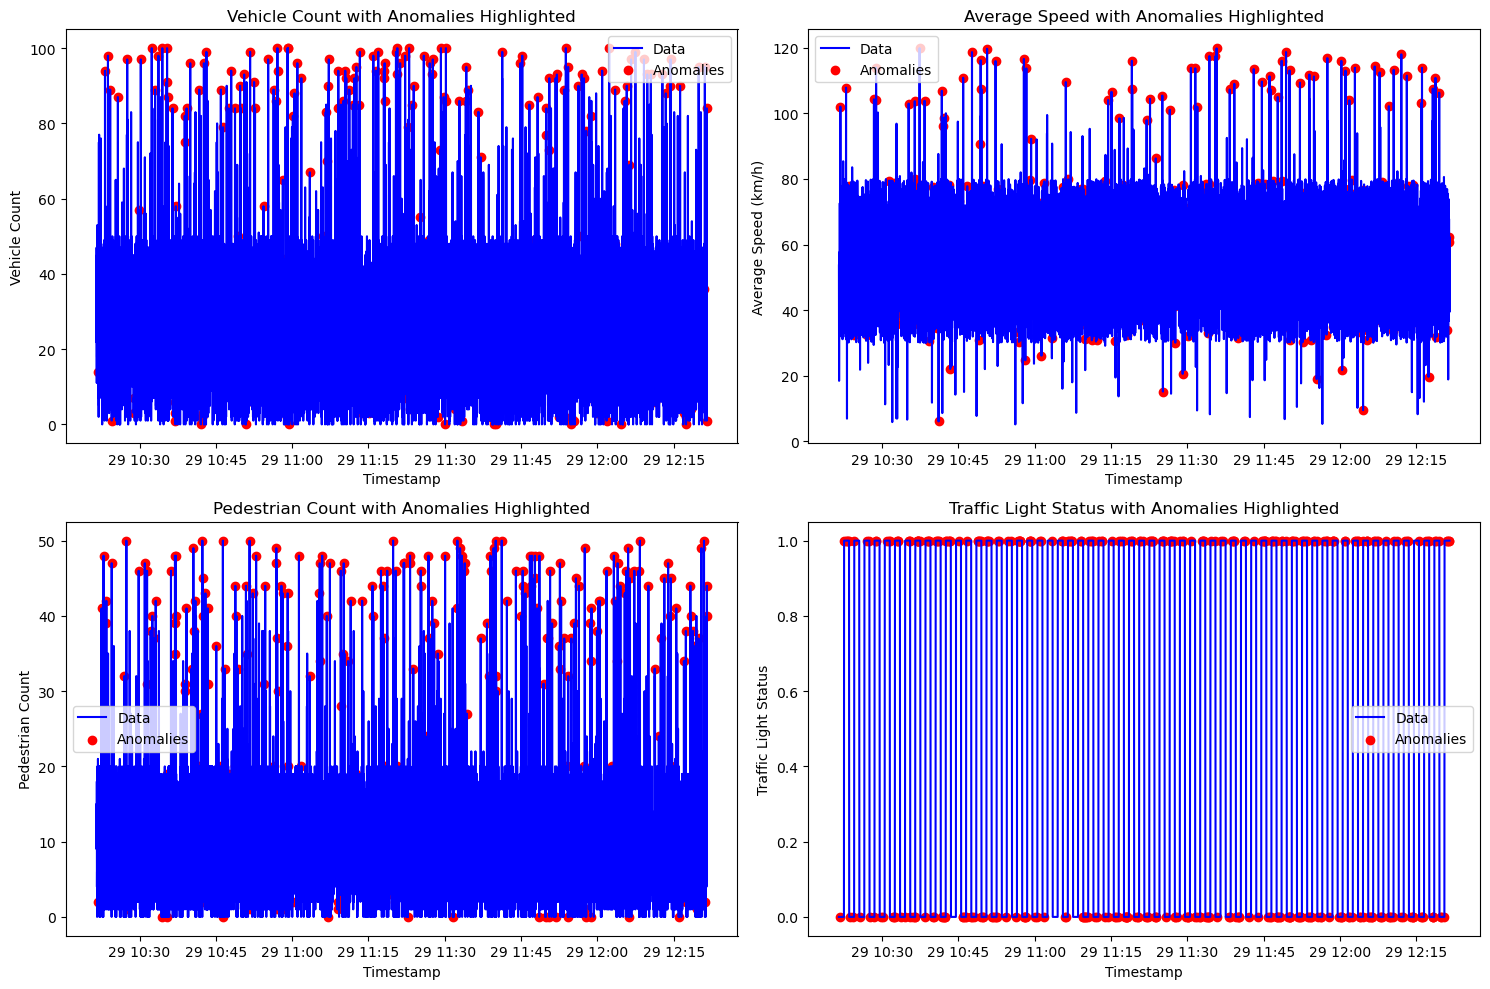

In [13]:

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Vehicle count plot
axs[0, 0].plot(df['timestamp'], df['vehicle_count'], label='Data', color='blue')
axs[0, 0].scatter(df['timestamp'][df['anomaly'] == 1], 
                  df['vehicle_count'][df['anomaly'] == 1], 
                  color='red', label='Anomalies')
axs[0, 0].set_title('Vehicle Count with Anomalies Highlighted')
axs[0, 0].set_xlabel('Timestamp')
axs[0, 0].set_ylabel('Vehicle Count')
axs[0, 0].legend()

# Average speed plot
axs[0, 1].plot(df['timestamp'], df['average_speed'], label='Data', color='blue')
axs[0, 1].scatter(df['timestamp'][df['anomaly'] == 1], 
                  df['average_speed'][df['anomaly'] == 1], 
                  color='red', label='Anomalies')
axs[0, 1].set_title('Average Speed with Anomalies Highlighted')
axs[0, 1].set_xlabel('Timestamp')
axs[0, 1].set_ylabel('Average Speed (km/h)')
axs[0, 1].legend()

# Pedestrian count plot
axs[1, 0].plot(df['timestamp'], df['pedestrian_count'], label='Data', color='blue')
axs[1, 0].scatter(df['timestamp'][df['anomaly'] == 1], 
                  df['pedestrian_count'][df['anomaly'] == 1], 
                  color='red', label='Anomalies')
axs[1, 0].set_title('Pedestrian Count with Anomalies Highlighted')
axs[1, 0].set_xlabel('Timestamp')
axs[1, 0].set_ylabel('Pedestrian Count')
axs[1, 0].legend()

# Traffic light status plot (binary)
axs[1, 1].plot(df['timestamp'], df['traffic_light_status'], label='Data', color='blue')
axs[1, 1].scatter(df['timestamp'][df['anomaly'] == 1], 
                  df['traffic_light_status'][df['anomaly'] == 1], 
                  color='red', label='Anomalies')
axs[1, 1].set_title('Traffic Light Status with Anomalies Highlighted')
axs[1, 1].set_xlabel('Timestamp')
axs[1, 1].set_ylabel('Traffic Light Status')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Load the existing synthetic data (or use the previous generated DataFrame)

In [14]:
# Load the existing synthetic data
input_file = 'synthetic_traffic_data.csv'
df = pd.read_csv(input_file)

### Get the approximate size of the current data

In [15]:
# Get the approximate size of the current data
current_size_mb = df.memory_usage(index=True).sum() / (1024 * 1024)
print(f"Current data size: {current_size_mb:.2f} MB")

Current data size: 0.27 MB


<span style="color:red">Current data size: 0.27 MBt
</span>

# Calculate how many rows are needed to reach 1GB

In [16]:

target_size_gb = 1  # Target size in GB
current_rows = len(df)
current_size_gb = current_size_mb / 1024  # Convert MB to GB
scaling_factor = target_size_gb / current_size_gb
required_rows = int(current_rows * scaling_factor)


In [17]:
print(f"Scaling up to approximately {required_rows:,} rows...")

Scaling up to approximately 26,831,247 rows...


<span style="color:red">

Scaling up to approximately 26,831,247 rows...
</span>

### Repeat the data to reach the target size

In [18]:

multiplied_df = pd.concat([df] * int(np.ceil(required_rows / current_rows)), ignore_index=True)

### Trim the dataset to the exact number of required rows

In [19]:

final_df = multiplied_df.iloc[:required_rows]

### Save the large dataset to a new file

In [20]:

output_file = 'synthetic_traffic_data_1GB.csv'
final_df.to_csv(output_file, index=False)

In [21]:
print(f"Final dataset size: {final_df.memory_usage(index=True).sum() / (1024 * 1024):.2f} MB")
print(f"1GB dataset saved to {output_file}")

Final dataset size: 1023.53 MB
1GB dataset saved to synthetic_traffic_data_1GB.csv


<span style="color:red"> Final Dataset Size : 1023 MB == 1 GB <span>an>

# Plot Anomalies Detection in System Metrics

* Configure Matplotlib for large datasets

In [22]:
# Configure Matplotlib for large datasets
mpl.rcParams['agg.path.chunksize'] = 10000

* Chunk processing and Isolation Forest model setup

In [23]:

chunk_size = 100000
chunks = pd.read_csv('synthetic_traffic_data_1GB.csv', parse_dates=['timestamp'], chunksize=chunk_size)


* Process and detect anomalies

In [24]:

processed_chunks = []
for chunk in chunks:
    # Apply Isolation Forest to detect anomalies
    model = IsolationForest(contamination=0.05, random_state=42)
    features = ['vehicle_count', 'average_speed', 'pedestrian_count', 'traffic_light_status']  # Replace with relevant columns
    chunk['anomaly'] = model.fit_predict(chunk[features])
    chunk['anomaly'] = chunk['anomaly'].map({-1: 1, 1: 0})  # Map -1 to anomaly (1) and 1 to normal (0)
    processed_chunks.append(chunk)


* Combine chunks into one DataFrame

In [25]:

df = pd.concat(processed_chunks)


* Downsample data for plotting

In [26]:

df_sampled = df.iloc[::100]


In [27]:
metrics = ['vehicle_count', 'average_speed', 'pedestrian_count', 'traffic_light_status']  # Update with your column names
titles = [
    'Vehicle Count with Anomalies Highlighted',
    'Average Speed with Anomalies Highlighted',
    'Pedestrian Count with Anomalies Highlighted',
    'Traffic Light Status with Anomalies Highlighted'
]
y_labels = ['Vehicle Count', 'Speed (km/h)', 'Pedestrian Count', 'Traffic Light Status']


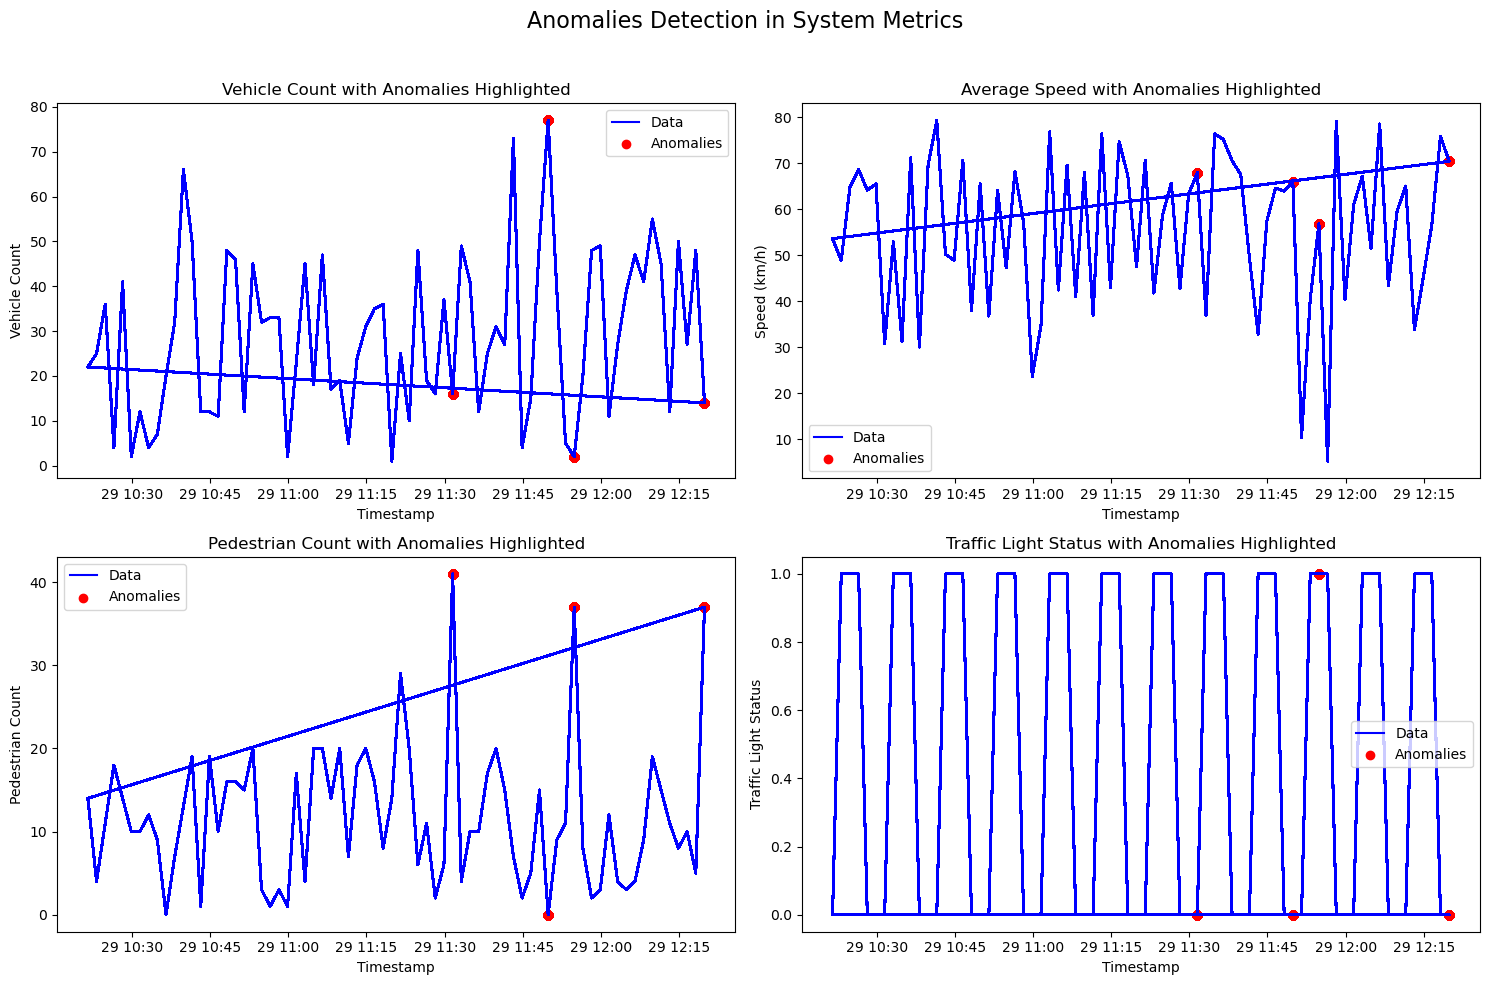

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Anomalies Detection in System Metrics', fontsize=16)

# Plot each metric
for i, ax in enumerate(axs.flat):
    ax.plot(df_sampled['timestamp'], df_sampled[metrics[i]], label='Data', color='blue')
    ax.scatter(df_sampled['timestamp'][df_sampled['anomaly'] == 1],
               df_sampled[metrics[i]][df_sampled['anomaly'] == 1],
               color='red', label='Anomalies')
    ax.set_title(titles[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel(y_labels[i])
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()
